In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,\
      MaxPool2D, Conv2D, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint 

In [10]:
x_test = np.load('npy/x_test_base.npy')
y_test = np.load('npy/y_test_base.npy')

x_train = np.load('npy/x_train_base.npy')
y_train = np.load('npy/y_train_base.npy')

In [12]:
x_train = x_train.reshape(x_train.shape[0],299,299,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],299,299,1).astype('float32')
x_train /= 255
x_test /= 255

In [14]:
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

In [37]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(299,299,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

In [38]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
train_gen = ImageDataGenerator(zoom_range=0.1)
test_gen = ImageDataGenerator()

In [40]:
training_set = train_gen.flow(x_train, y_train)

In [41]:
test_set = train_gen.flow(x_test, y_test)

In [42]:
model_sate_path = 'npy.h5'
checkpoint_callback = ModelCheckpoint(model_sate_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [43]:
len(x_train)//32

21

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 297, 297, 32)      320       
_________________________________________________________________
activation_12 (Activation)   (None, 297, 297, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 295, 295, 32)      9248      
_________________________________________________________________
activation_13 (Activation)   (None, 295, 295, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 147, 147, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 145, 145, 64)      18496     
_________________________________________________________________
activation_14 (Activation)   (None, 145, 145, 64)     

In [45]:
history = model.fit(training_set,
                    steps_per_epoch=len(x_train)//32,
                    validation_data=test_set,
                    validation_steps=len(x_test)//32,
                    epochs=32,
                    callbacks=[checkpoint_callback])

Epoch 1/32
21/21 [==============================] - ETA: 0s - loss: 1.4454 - accuracy: 0.5031
Epoch 00001: val_accuracy improved from -inf to 0.44792, saving model to npy.h5
21/21 [==============================] - 73s 3s/step - loss: 1.4454 - accuracy: 0.5031 - val_loss: 0.7591 - val_accuracy: 0.4479
Epoch 2/32
21/21 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5324
Epoch 00002: val_accuracy improved from 0.44792 to 0.47917, saving model to npy.h5
21/21 [==============================] - 76s 4s/step - loss: 0.6920 - accuracy: 0.5324 - val_loss: 0.6954 - val_accuracy: 0.4792
Epoch 3/32
21/21 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.5910
Epoch 00003: val_accuracy improved from 0.47917 to 0.53125, saving model to npy.h5
21/21 [==============================] - 73s 3s/step - loss: 0.6784 - accuracy: 0.5910 - val_loss: 0.6957 - val_accuracy: 0.5312
Epoch 4/32
21/21 [==============================] - ETA: 0s - loss: 0.6805 - accuracy

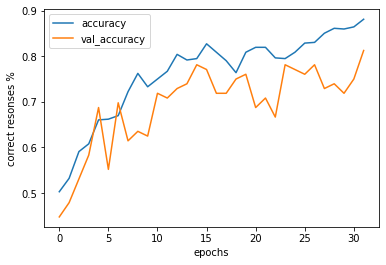

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('correct resonses %')
plt.legend()
plt.show()